In [1]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()

def PrintKeys(fileName):
    for k in uproot.open(fileName).allkeys():
        print(k)
        
def OpenRoot(fileName,tree):
    rTree = uproot.open(fileName)[tree]
    df = rTree.pandas.df(['*'],flatten=False,namedecode='utf-8')
    return df

# Special trick for string columns
def decodeList(l):
    return [x.decode(encoding='UTF-8') for x in l]

In [2]:
dirPath = '/Users/sdporzio/Data/Simulation_AlphaSourceVUVLamp/'
fNames = [
't-0_w-1_ev-10000000_s-100',
't-0_w-2_ev-10000000_s-100',
't-0_w-3_ev-10000000_s-100',
't-0_w-4_ev-10000000_s-100',
't-1_w-1.5_ev-10000000_s-100',
't-2_w-1_ev-10000000_s-100',
't-3_w-1_ev-10000000_s-100'
]
    
md, tr, ev, alphas, contAlphas = {}, {}, {}, {}, {}
widths = [float(fn.split('w-')[1].split('_ev')[0]) for fn in fNames]

In [3]:
# Open root files
for fName in tqdm(fNames):
    md[fName] = OpenRoot(dirPath+fName+'.root','metadata')
    tr[fName] = OpenRoot(dirPath+fName+'.root','tracks_data')
    ev[fName] = OpenRoot(dirPath+fName+'.root','event_data')
    tr[fName]['distEnd'] = tr[fName].eval('sqrt(xEnd**2. + yEnd**2.)')
    
    alphas[fName] = tr[fName].query('particle_pdg==1000020040') # Select alphas
    contAlphas[fName] = alphas[fName].query('exitedCollection==0') # Select fully contained alphas

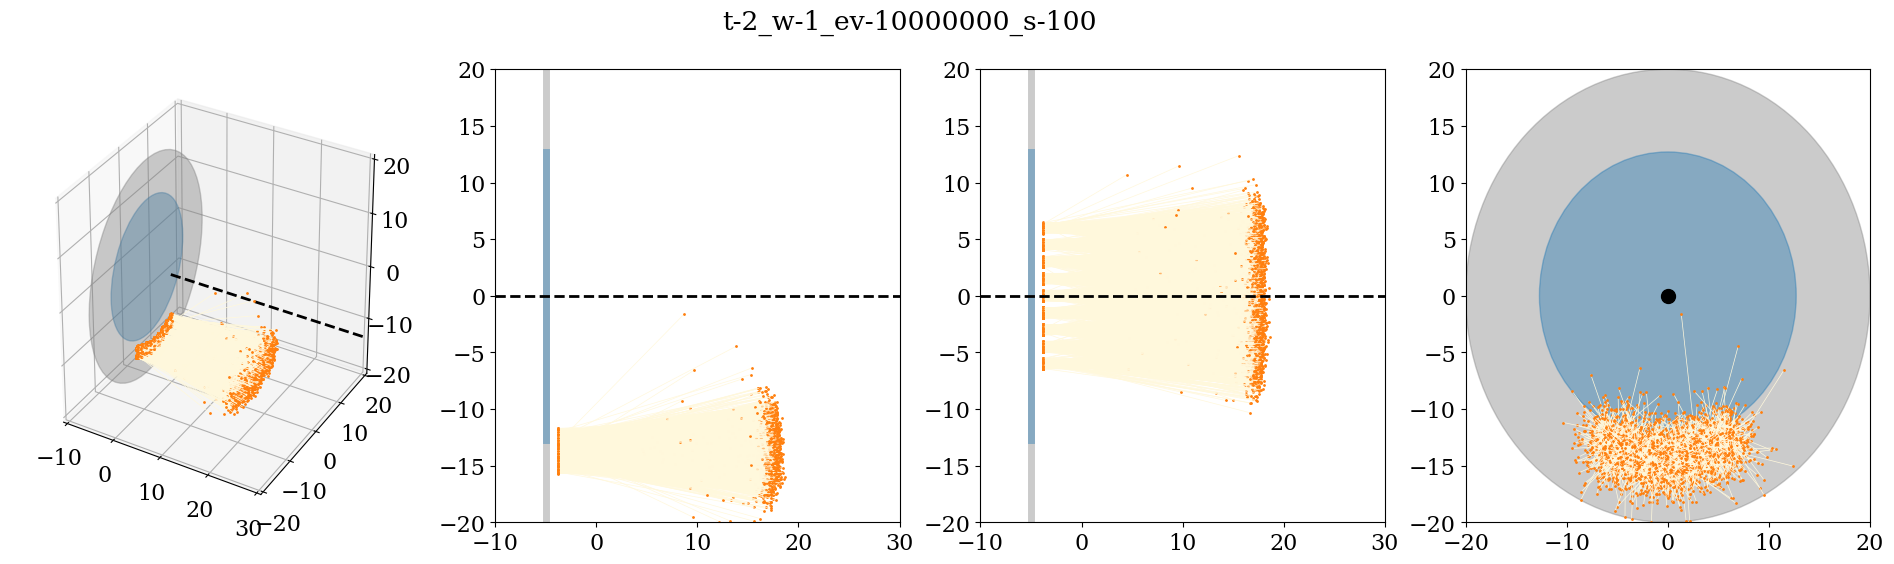

In [7]:
# Select file
fName = fNames[5]

# Create array of coordinates
xs, ys, zs = [],[],[]

for i in tqdm(range(len(alphas[fName]))):
    xs.append([alphas[fName].iloc[i]['xStart'],alphas[fName].iloc[i]['xEnd']])
    ys.append([alphas[fName].iloc[i]['yStart'],alphas[fName].iloc[i]['yEnd']])
    zs.append([alphas[fName].iloc[i]['zStart'],alphas[fName].iloc[i]['zEnd']])

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

width = 40
length = 40
offset = -5

zlims = [-10,length-10]
xlims = [-width/2.,width/2.]
ylims = [-width/2.,width/2.]

# fig = plt.figure(figsize=(8,8),facecolor='white',dpi=100)
# ax = fig.add_subplot(111, projection='3d')
# ax.axes.set_xlim3d(left=zlims[0], right=zlims[1]) 
# ax.axes.set_ylim3d(bottom=ylims[0], top=ylims[1]) 
# ax.axes.set_zlim3d(bottom=xlims[0], top=xlims[1])
# p1 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
# p2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
# ax.add_patch(p1)
# ax.add_patch(p2)
# art3d.pathpatch_2d_to_3d(p1, z=offset, zdir="x")
# art3d.pathpatch_2d_to_3d(p2, z=offset, zdir="x")
# # plt.plot(es['zStart'],es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.1,zorder=99)
# plt.plot([0,length],[0,0],[0,0],ls='--',color='black',lw=2,zorder=99)
# for i in range(len(xs)):
#     plt.plot(zs[i],xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1,zorder=99)
# plt.title(fName)
# plt.show()


fig = plt.figure(figsize=(24,6),facecolor='white',dpi=100)
# plt.subplot(141)
ax = fig.add_subplot(141, projection='3d')
ax.axes.set_xlim3d(left=zlims[0], right=zlims[1]) 
ax.axes.set_ylim3d(bottom=ylims[0], top=ylims[1]) 
ax.axes.set_zlim3d(bottom=xlims[0], top=xlims[1])
p1 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
p2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
ax.add_patch(p1)
ax.add_patch(p2)
art3d.pathpatch_2d_to_3d(p1, z=offset, zdir="x")
art3d.pathpatch_2d_to_3d(p2, z=offset, zdir="x")
# plt.plot(es['zStart'],es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.1,zorder=99)
plt.plot([0,length],[0,0],[0,0],ls='--',color='black',lw=2,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1,zorder=99)

plt.subplot(142)
# plt.plot(es['zStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.plot([offset,offset],[-width/2.,width/2.],color='C7',lw=5,alpha=0.4,ls='-')
plt.plot([offset,offset],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.4,ls='-')
plt.xlim(zlims)
plt.ylim(ylims)
plt.axhline(0,ls='--',color='black',lw=2)

plt.subplot(143)
# plt.plot(es['zStart'],es['xStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],xs[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.plot([offset,offset],[-width/2.,width/2.],color='C7',lw=5,alpha=0.4,ls='-')
plt.plot([offset,offset],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.4,ls='-')
plt.xlim(zlims)
plt.ylim(xlims)
plt.axhline(0,ls='--',color='black',lw=2)

plt.subplot(144)
# plt.plot(es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.scatter(0,0,color='black',s=100)
ax = plt.gca()
t1 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
t2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
ax.add_patch(t1)
ax.add_patch(t2)
plt.xlim(xlims)
plt.ylim(ylims)
plt.suptitle(fName)
plt.show()

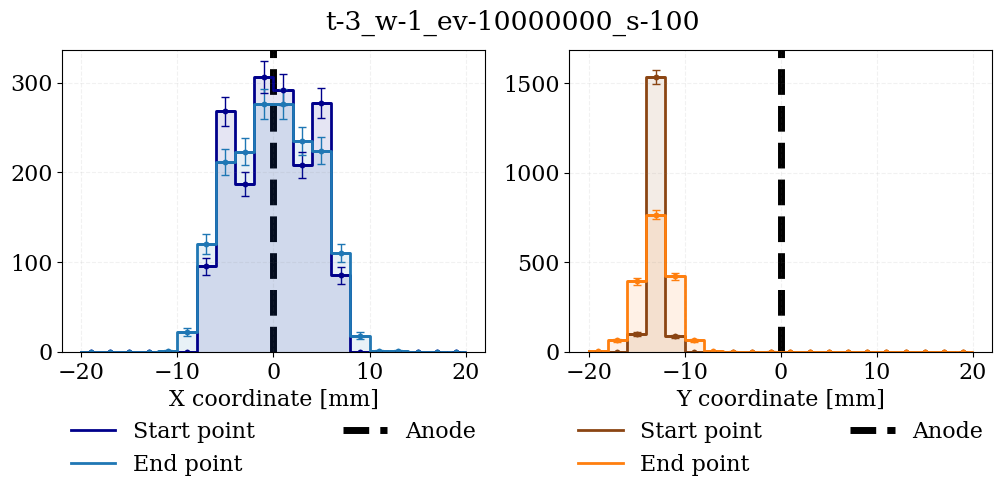

In [10]:
# Select file
fName = fNames[6]

nbins=20

fig = plt.figure(figsize=(12,4),facecolor='white',dpi=100)
plt.subplot(121)
hp.HepHist(alphas[fName]['xStart'],nbins=nbins,xlims=xlims,color='darkblue',label='Start point')
hp.HepHist(alphas[fName]['xEnd'],nbins=nbins,xlims=xlims,color='C0',label='End point')
plt.axvline(0,ls='--',lw=5,color='black',zorder=-1,label='Anode')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.2, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('X coordinate [mm]')

plt.subplot(122)
hp.HepHist(alphas[fName]['yStart'],nbins=nbins,xlims=ylims,color='saddlebrown',label='Start point')
hp.HepHist(alphas[fName]['yEnd'],nbins=nbins,xlims=ylims,color='C1',label='End point')
plt.axvline(0,ls='--',lw=5,color='black',zorder=-1,label='Anode')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.2, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('Y coordinate [mm]')

plt.suptitle(fName)

plt.show()

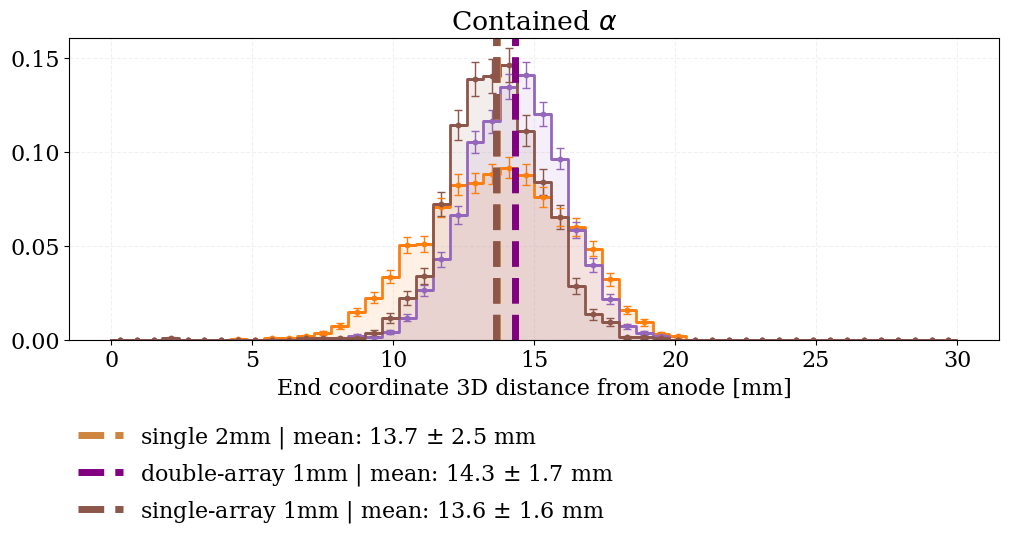

In [25]:
nbins=50
colors = ['C0','C1','C2','C3','C6','C4','C5']
dcolors = ['darkblue','peru','olivedrab','maroon','pink','purple','C5']
labs = ['single 1mm', 'single 2mm', 'single 3mm', 'single 4mm', 'double-array 1.5 mm','double-array 1mm','single-array 1mm']
curr_fnames_idx = [1,5,6]

fig = plt.figure(figsize=(12,4),facecolor='white',dpi=100)
for i in curr_fnames_idx:
    fName = fNames[i]
    #     toPlot = alphas[fName]
    toPlot = contAlphas[fName]
    width = widths[i]
    mean = toPlot['distEnd'].mean()
    std = toPlot['distEnd'].std()
    hp.HepHist(toPlot['distEnd'],norm=True,nbins=nbins,xlims=[0,30],color=colors[i])
    plt.axvline(mean,ls='--',lw=5,color=dcolors[i],label=f'{labs[i]} | mean: {mean:.1f}'+r' $\pm$ '+f'{std:.1f} mm')
#     plt.axvline(mean+std,ls=':',lw=1,color=dcolors[i])
#     plt.axvline(mean-std,ls=':',lw=1,color=dcolors[i])
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=1, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('End coordinate 3D distance from anode [mm]')
# plt.title(r'Total $\alpha$ emitted')
plt.title(r'Contained $\alpha$')
plt.show()

In [26]:
from scipy import interpolate
xs = [0,1,15]
ys = [0,1/1.3,15/0.8]
eTime = interpolate.interp1d(xs, ys, kind='quadratic', fill_value='extrapolate')

def distToAx(vec):
    return np.sqrt(vec[0]**2.+vec[1]**2.)

time, timeDiff = {}, {}
for fName in tqdm(fNames):
    time[fName],timeDiff[fName] = [], []
    toRun = alphas[fName]
    toRun = contAlphas[fName]
    for i in tqdm(range(len(toRun))):
    # for i in tqdm(range(3)):
        # For each alpha, take start and end point
        s = np.array([toRun.iloc[i]['xStart'],toRun.iloc[i]['yStart'],0])
        e = np.array([toRun.iloc[i]['xEnd'],toRun.iloc[i]['yEnd'],toRun.iloc[i]['zEnd']])
        # Get direction vector
        shiftV = e - s
        normV = np.sqrt(shiftV[0]**2 + shiftV[1]**2 + shiftV[2]**2)
        dirV = shiftV/normV
        # Take the number of steps for this track (each step, 1 mm)
        steps = int(np.ceil(normV))

        thisTime, thisTimeDiff = [], []
        for j in range(steps+1):
            vecLoc = dirV*j + s
            dist = distToAx(vecLoc)
            thisTime.append(eTime(dist))

        thisTime = np.array(thisTime)
        thisTimeDiff = thisTime-thisTime.min()

        for t in thisTime:
            time[fName].append(t)

        for t in thisTimeDiff:
            timeDiff[fName].append(t)
    time[fName] = np.array(time[fName])
    timeDiff[fName] = np.array(timeDiff[fName])

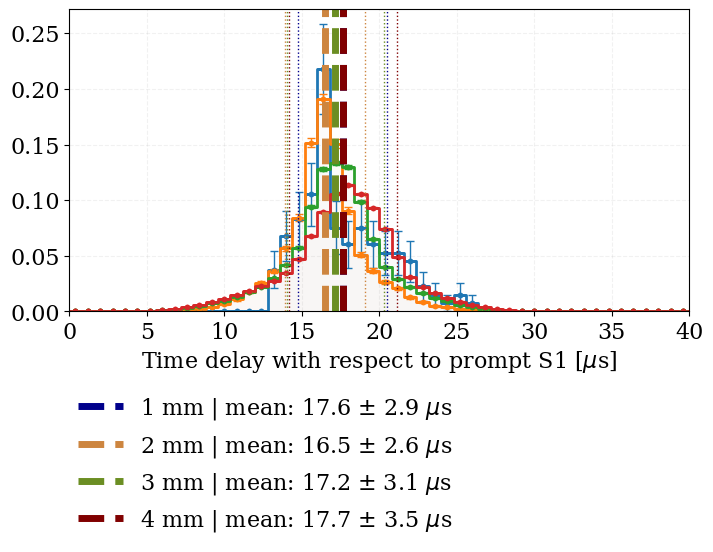

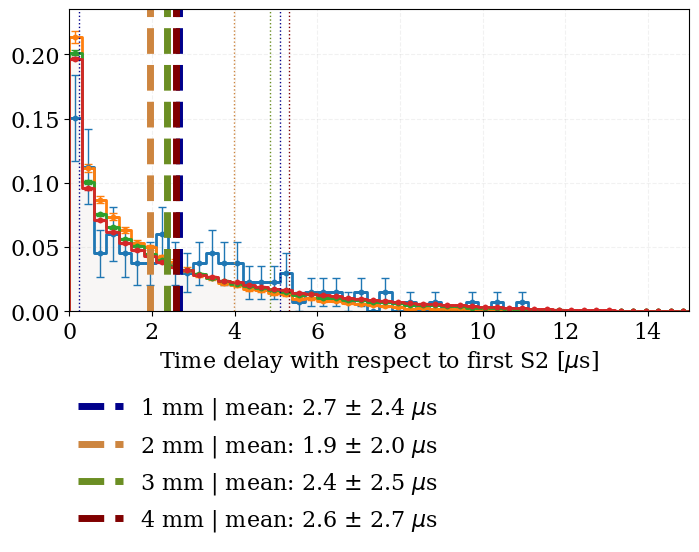

In [111]:
nbins=50

xlims = [0,40]
fig = plt.figure(figsize=(8,4),facecolor='white',dpi=100)
for i in range(len(fNames)):
#     i = i+1
    fName = fNames[i]
    width = int(fName[0])
    mean = time[fName].mean()
    std = time[fName].std()
    hp.HepHist(time[fName],nbins=nbins,norm=True,xlims=xlims,color=colors[i],alpha=0.01)
    plt.axvline(mean,ls='--',lw=5,color=dcolors[i],label=f'{width} mm | mean: {mean:.1f}'+r' $\pm$ '+f'{std:.1f}'+r' $\mu$s')
    plt.axvline(mean+std,ls=':',lw=1,color=dcolors[i])
    plt.axvline(mean-std,ls=':',lw=1,color=dcolors[i])
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=1, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('Time delay with respect to prompt S1'+r' [$\mu$s]')
plt.xlim(xlims)
plt.show()

xlims = [0,15]
fig = plt.figure(figsize=(8,4),facecolor='white',dpi=100)
for i in range(len(fNames)):
#     i = i+1
    fName = fNames[i]
    width = int(fName[0])
    mean = timeDiff[fName].mean()
    std = timeDiff[fName].std()
    hp.HepHist(timeDiff[fName],nbins=nbins,norm=True,xlims=xlims,color=colors[i],alpha=0.01)
    plt.axvline(mean,ls='--',lw=5,color=dcolors[i],label=f'{width} mm | mean: {mean:.1f}'+r' $\pm$ '+f'{std:.1f}'+r' $\mu$s')
    plt.axvline(mean+std,ls=':',lw=1,color=dcolors[i])
    plt.axvline(mean-std,ls=':',lw=1,color=dcolors[i])
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=1, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('Time delay with respect to first S2'+r' [$\mu$s]')
plt.xlim(xlims)
plt.show()

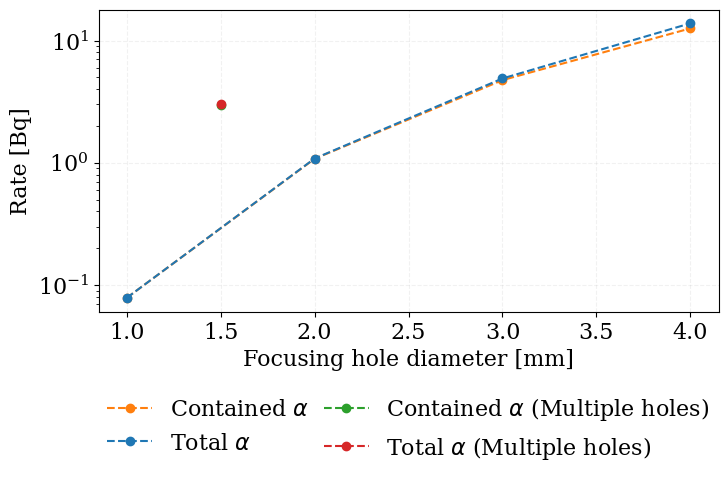

In [24]:
rate = 7.5*1e3 # Bq (7.5 kBq)

names = [f'{w:.1f} mm' for w in widths]
nAlphas,nContAlphas = [],[]
for fName in fNames:
    nAlphas.append(len(alphas[fName]))
    nContAlphas.append(len(contAlphas[fName]))
    
nAlphas = np.array(nAlphas)
nContAlphas = np.array(nContAlphas)

# Find fraction of total emitted (factor of 2 because we emit semi-isostropically)
nAlphas = nAlphas/(10000000*2.)
nContAlphas = nContAlphas/(10000000*2.)

# Find actual rate in kBq
nAlphas = nAlphas*rate
nContAlphas = nContAlphas*rate

# Convert to Bq
# nAlphas = nAlphas*1e3
# nContAlphas = nContAlphas*1e3

fig = plt.figure(figsize=(8,4),facecolor='white',dpi=100)
plt.plot(widths[:-1],nContAlphas[:-1],marker='o',ls='--',color='C1',label=r'Contained $\alpha$')
plt.plot(widths[:-1],nAlphas[:-1],marker='o',ls='--',color='C0',label=r'Total $\alpha$')
plt.plot(widths[-1],nContAlphas[-1],marker='o',ls='--',color='C2',label=r'Contained $\alpha$ (Multiple holes)')
plt.plot(widths[-1],nAlphas[-1],marker='o',ls='--',color='C3',label=r'Total $\alpha$ (Multiple holes)')
plt.grid(ls='--',color='C7',alpha=0.1,)
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
# plt.gca().set_xticks(np.linspace(0,len(fNames),len(fNames)))
# plt.gca().set_xticklabels(names, rotation='0', fontsize=18)
# plt.ylabel('Fraction')
plt.ylabel('Rate [Bq]')
plt.xlabel('Focusing hole diameter [mm]')
plt.yscale('log')
plt.show()